In [1]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import stopwords
import re
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data = pd.read_csv(r"D:\Anaconda\tripadvisor_hotel_reviews.csv") # Import dataset from the local file

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  109 non-null    object
 1   Rating  109 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [4]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
data['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [6]:
data['review_lower'] = data['Review'].str.lower()  # Make the dataset into lowercase
data['review_lower']

0      nice hotel expensive parking got good deal sta...
1      ok nothing special charge diamond member hilto...
2      nice rooms not 4* experience hotel monaco seat...
3      unique, great stay, wonderful time hotel monac...
4      great stay great stay, went seahawk game aweso...
                             ...                        
104    fairmont hotel singapore splendid, stayed fair...
105    great hotel stayed hotel night route perth chr...
106    great hotel centre stayed 5 nights room overlo...
107    great location great value great hotel husband...
108    lovely hotel great location stayed vacation to...
Name: review_lower, Length: 109, dtype: object

In [7]:
en_stopwords = stopwords.words('english') # Store all the stopwords from enlish language in en_stopwords
en_stopwords.remove('not') # Remove the word "not" from the stopwords list


In [8]:
data['review_nostopwords'] = data['review_lower'].apply(lambda x : " ".join([words for words in x.split() if words not in en_stopwords])) # Using lambda function remove all the stopwords

In [9]:
data['review_nostopwords'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,'

In [10]:
data['review_nostopwords_nopunct'] = data['review_nostopwords'].apply(lambda x: (re.sub(r"\*", "star", x))) # Subtitue "*" with "star"
data['review_nostopwords_nopunct'] = data['review_nostopwords'].apply(lambda x: (re.sub(r"[^\w\s]", " ", x))) # Remove all the punctuations 

In [11]:
data['review_nostopwords_nopunct'] [2]

'nice rooms not 4  experience hotel monaco seattle good hotel n t 4  level positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized  missed 3 separate wakeup calls  concierge busy hard touch  n t provide guidance special requests tv hard use ipod sound dock suite non functioning  decided book mediterranean suite 3 night weekend stay 1st choice rest party filled  comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower before stay hotel arrange car service price 53 tip reasonable driver waiting arrival checkin easy downside room picked 2 person jacuzi tub bath accessories salts bubble bath n t stay  night got 12 1a checked voucher bottle champagne nice gesture fish waiting room  impression room huge open space felt room big  tv far away bed chore change channel  ipod dock broken disappointing in morning way asked desk check thermostat said 65f 74 2 deg

In [18]:
data['review_tokenize'] = data['review_nostopwords_nopunct']. apply(lambda x : word_tokenize(x)) # Used word tokenization to split everything into words
data['review_tokenize'] [0]

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'reviews',
 'valet',
 'parking',
 'check',
 'quick',
 'easy',
 'little',
 'disappointed',
 'non',
 'existent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillows',
 'not',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bangs',
 'doors',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 'maybe',
 'noisy',
 'neighbors',
 'aveda',
 'bath',
 'products',
 'nice',
 'not',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'pay',
 '40',
 'parking',
 'night']

In [19]:
ps = PorterStemmer()
data['stemmed'] = data['review_tokenize'].apply(lambda x : [ps.stem(token) for token in x]) # Used Stemmer to convert words to its base form (without meaning)

In [37]:
ls = WordNetLemmatizer()
data['lammatized'] = data['review_tokenize'].apply(lambda x : [ls.lemmatize(token) for token in x]) # Used Lemmatizer to convert words to its base form (with meaning)

In [38]:
token_clean = sum(data['lammatized'], [])

In [43]:
from nltk import ngrams
unigrams =list(ngrams(token_clean,1))
unigram_series = pd.Series(unigrams)
count = unigram_series.value_counts()
print(count)

(hotel,)        293
(room,)         278
(great,)        127
(not,)          123
(stay,)          97
               ... 
(macy,)           1
(radius,)         1
(cinerama,)       1
(gourmet,)        1
(connected,)      1
Name: count, Length: 2484, dtype: int64


Text(0, 0.5, 'Frequency')

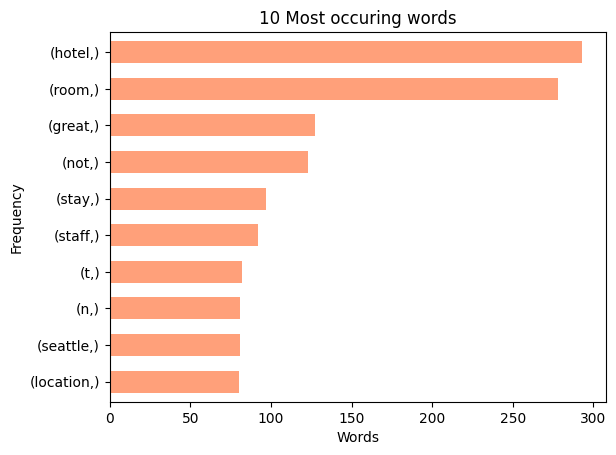

In [47]:
count[:10].sort_values().plot.barh(color = "lightsalmon",width = 0.6)
plt.title("10 Most occuring words")
plt.xlabel("Words")
plt.ylabel("Frequency")